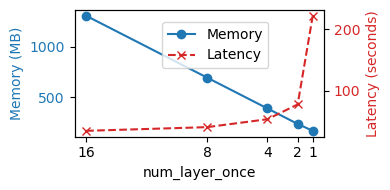

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# 读取CSV文件
df = pd.read_csv('../data/extracted_log_data.csv')

# 提取第一个batch size
first_bs = df['BS'].unique()[2]

# 筛选第一个batch size的数据，并按num_layer_once进行反向排序
bs_data = df[df['BS'] == first_bs].sort_values(by='num_layer_once', ascending=False)

fig, ax1 = plt.subplots(figsize=(4, 2))

# 设置左边y轴
color = 'tab:blue'
ax1.set_xlabel('num_layer_once')
ax1.set_ylabel('Memory (MB)', color=color)
ax1.plot(bs_data['num_layer_once'], bs_data['Memory'], color=color, marker='o', label='Memory')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(bs_data['num_layer_once'])
ax1.set_xticklabels(bs_data['num_layer_once'])

# 创建右边的y轴
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Latency (seconds)', color=color)
ax2.plot(bs_data['num_layer_once'], bs_data['Latency'], color=color, marker='x', linestyle='--', label='Latency')
ax2.tick_params(axis='y', labelcolor=color)

# 标题和图例
# plt.title(f'BS={first_bs} - Memory and Latency vs num_layer_once')
plt.gca().invert_xaxis()
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.4,0.9))

# 显示图表
# plt.show()
plt.savefig('../figs/motivation-loading.pdf', bbox_inches='tight')

In [15]:
bs_data

Memory     Latency  BS  num_layer_once  layer_load_time  \
0   869.602051  387.182657  16               8          0.08468   
11  561.348145  404.418528  16               4          0.06059   
13  407.221191  437.188322  16               2          0.07068   
25  310.079590  576.901448  16               1          0.13239   

    layer_delete_time  
0               2.043  
11              1.033  
13              0.506  
25              0.231